In [1]:
# Importing Libraries

import re
import csv
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import interactive

In [2]:
# Setting the max limit of number of items to display in bar plot
maxBars = 60
class Count:
    count = 0

In [3]:
# Reading the given dataset into a dataframe
census_df = pd.read_csv('dataset1_dirty.csv')

# Printing the info of the dataframe
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
salary            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


# Histograms before Preprocessing Dataset

In [4]:
# Function to print BarPlots for a given feature in a dataset
def histograms_plot(dataframe, feature):
    # chevk if column is relevant.
    if feature == "id":
        return
    
    print("Distribution Plot for "+feature+":")
     
    # Set Figure Size and Style.    
    sns.set(rc={'figure.figsize':(25,7)})
    sns.set(style="darkgrid")
    
    # Get Number of Unique values in the given feature
    numOfBars = dataframe[feature].value_counts().count()
    
    # Check if all unique values can be displayed for the feature, else display top values
    if numOfBars > maxBars and dataframe[feature].dtype == np.object:
        plotFeature = dataframe[feature].value_counts()[:maxBars]
        print("(Limiting Number of bars to "+str(maxBars)+" for better readability. Total uniques values in this feature are:"+str(numOfBars)+")")

    # Handling for feature: fnlwgt, as it has large number of unique features.
    elif feature == 'fnlwgt':
        plotFeature = pd.cut(dataframe[feature], 30, include_lowest=1)
        dataframe['id'] = dataframe.index
        plotFeature = dataframe.groupby(plotFeature)['id'].nunique()
        dataframe.drop(['id'], axis=1)

    else:
        plotFeature = dataframe[feature].value_counts()
    
    # Plot the Barplot
    ax = sns.barplot(plotFeature.index, plotFeature.values, alpha=1, color="salmon", saturation=.5, ci=None)
    
    # Set Grid, Xticks, YTicks and Labels on X,Y axis
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)
    plt.title('Frequency Distribution of '+feature,fontsize=18)
    plt.ylabel('Number of Occurrences', fontsize=14)
    plt.xlabel(feature, fontsize=14)
    
    # Show plot
    plt.show()
    
    # Save plot
    fig = ax.get_figure()
    Count.count= Count.count+1
    fig.savefig(str(Count.count))


Distribution Plot for age:


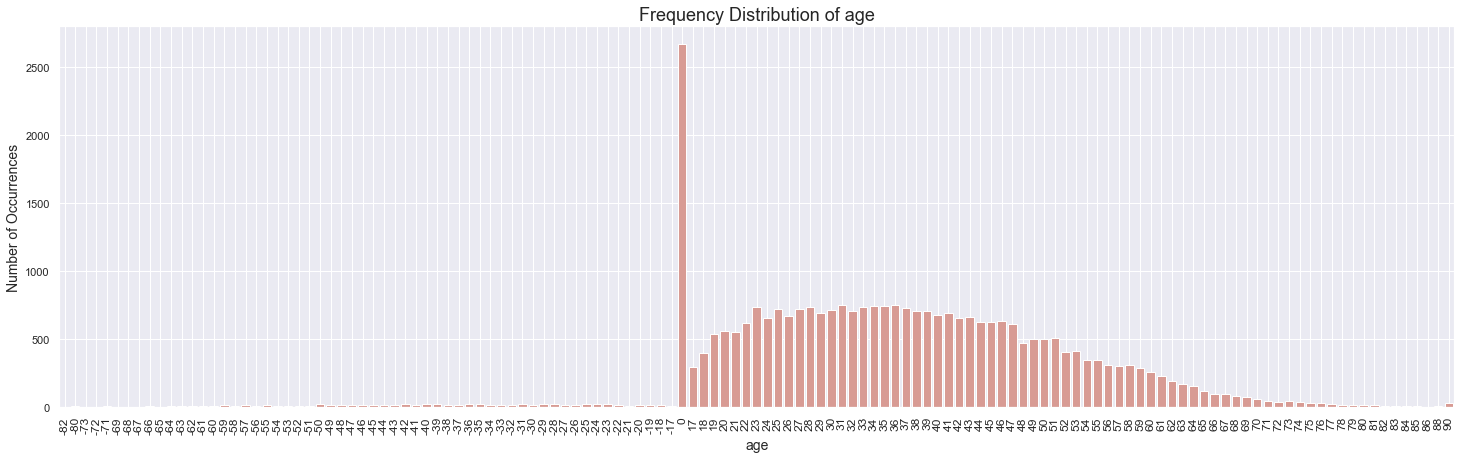

Distribution Plot for workclass:
(Limiting Number of bars to 60 for better readability. Total uniques values in this feature are:75)


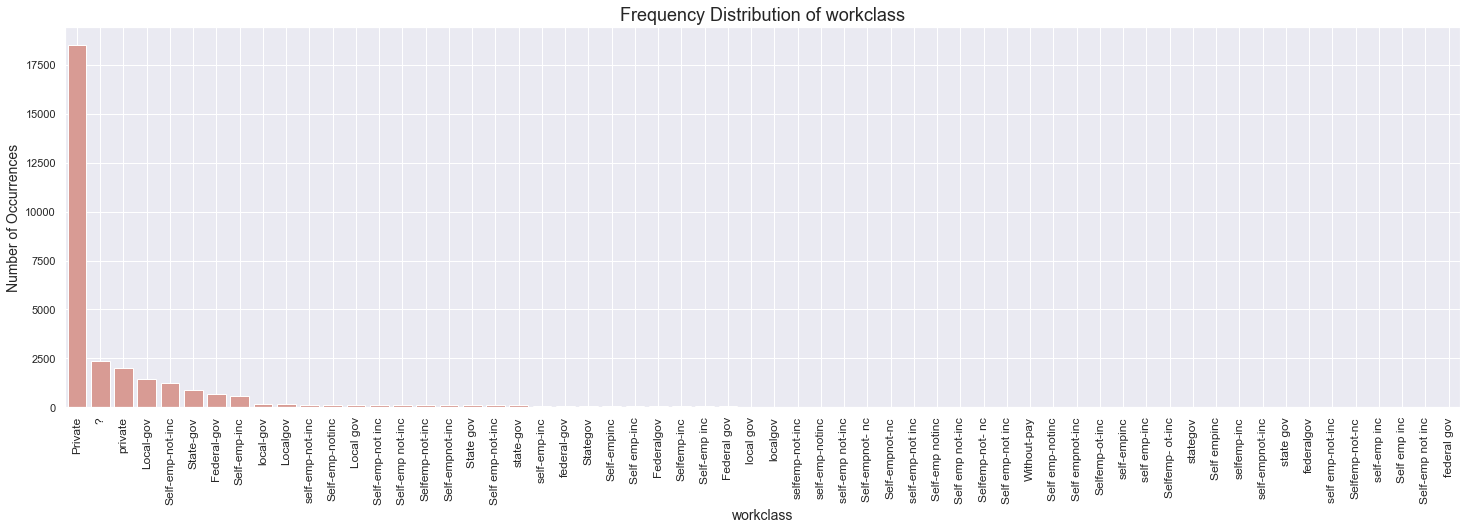

Distribution Plot for fnlwgt:


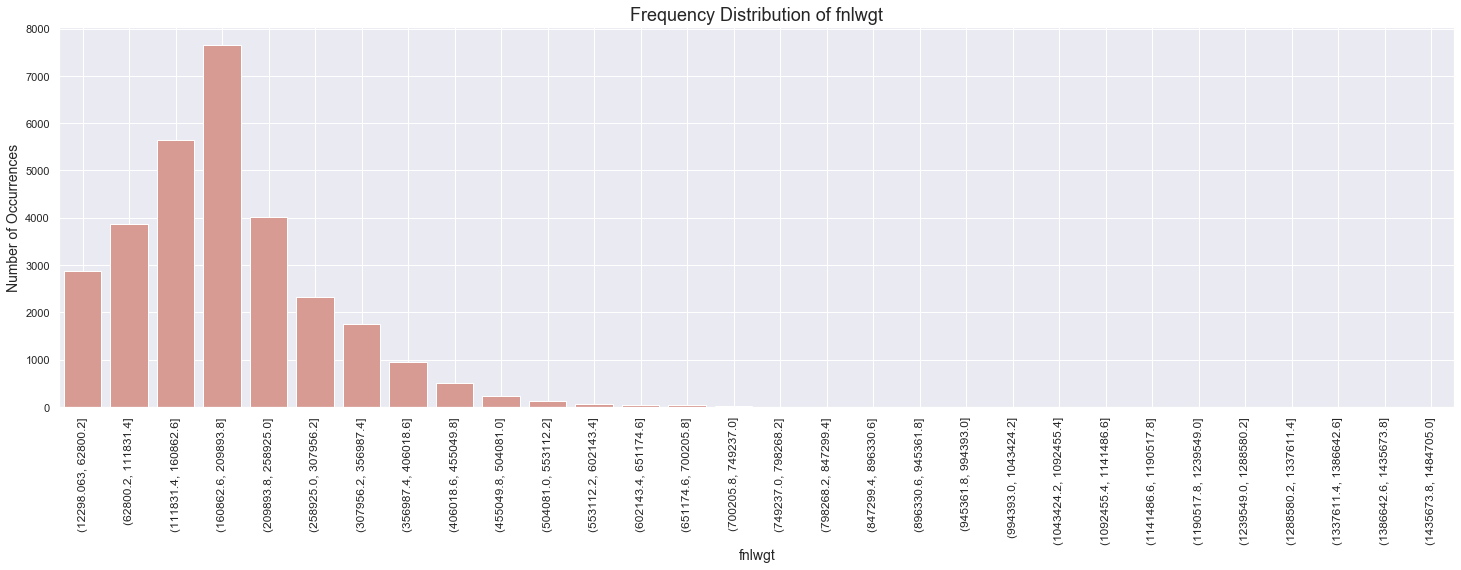

Distribution Plot for education:


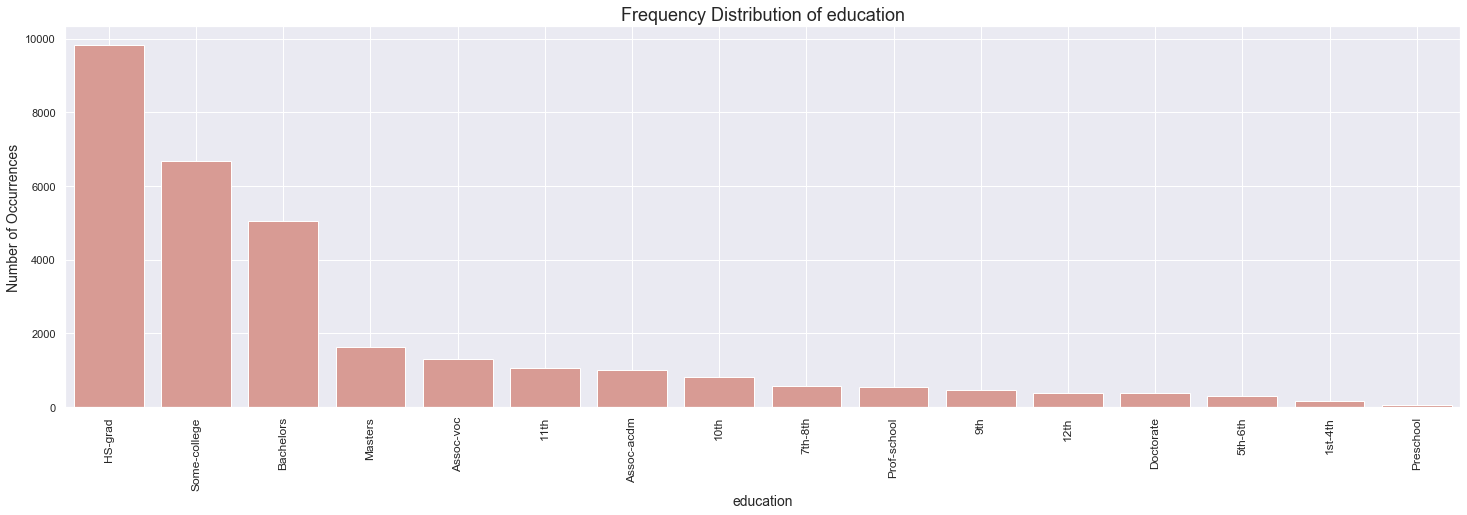

Distribution Plot for education-num:


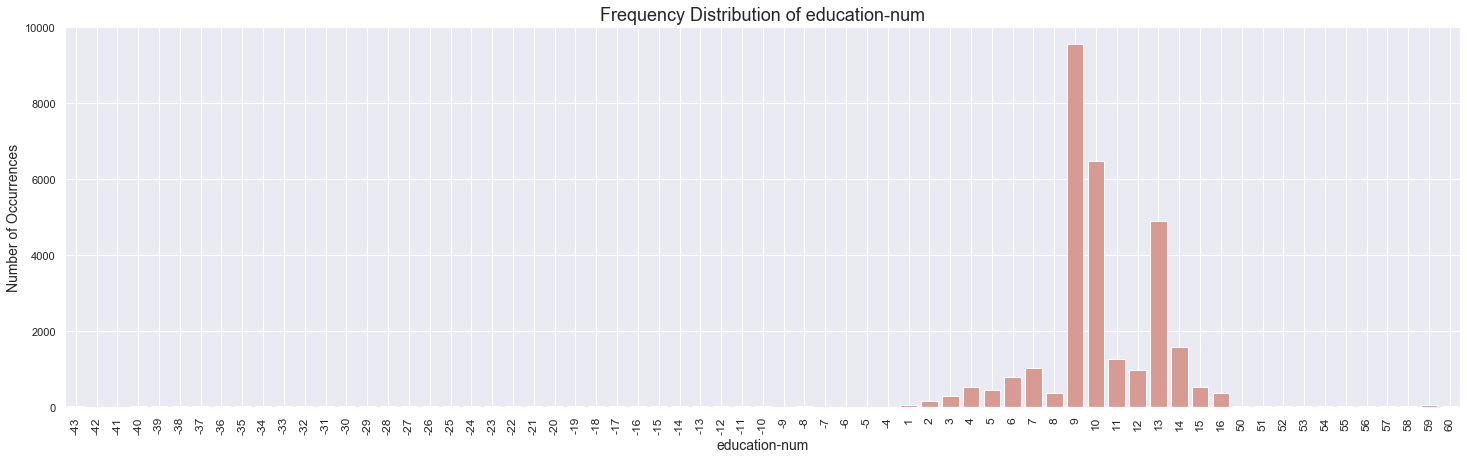

Distribution Plot for marital-status:


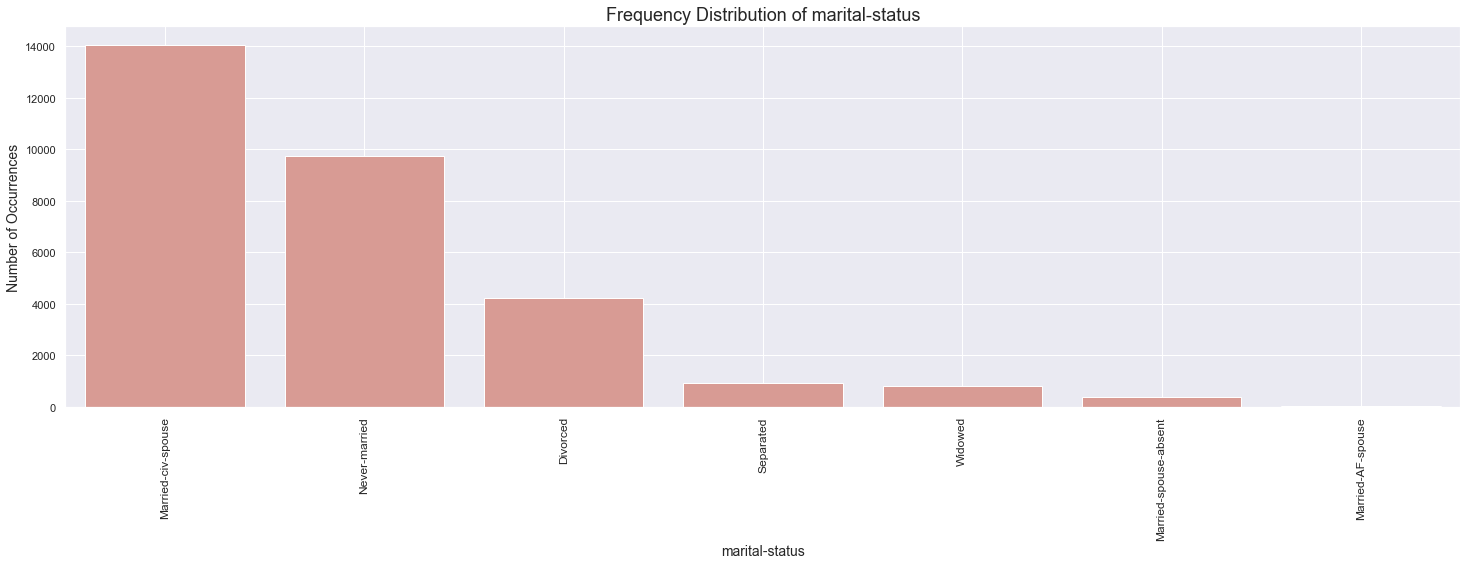

Distribution Plot for occupation:
(Limiting Number of bars to 60 for better readability. Total uniques values in this feature are:474)


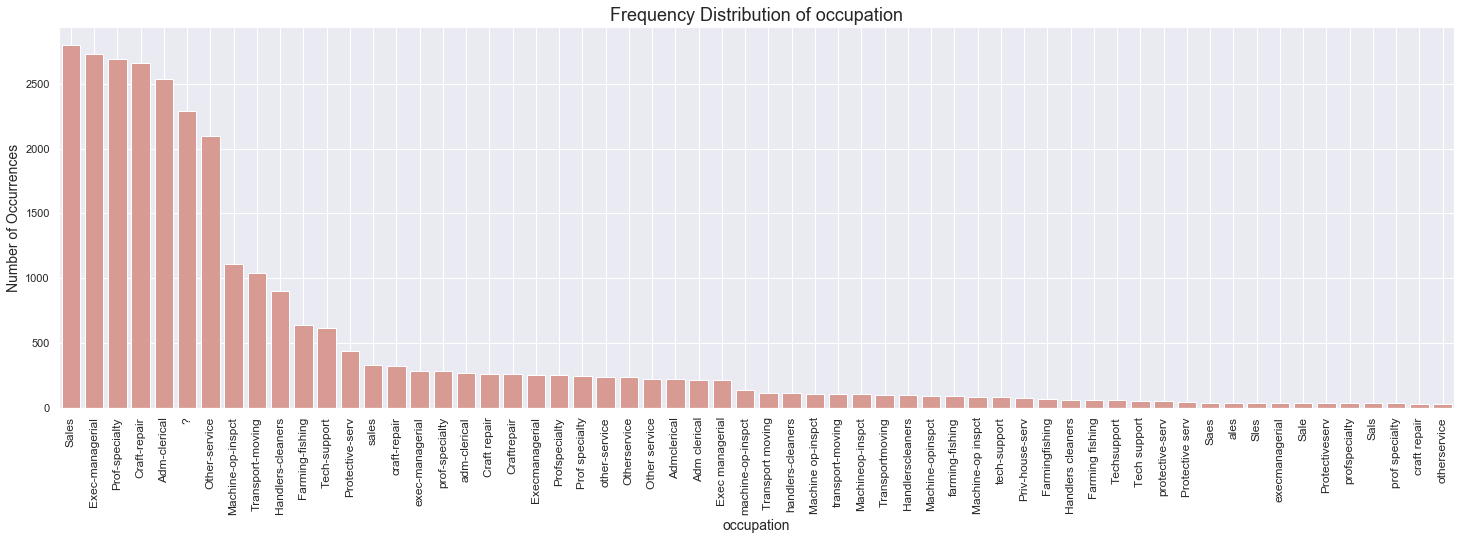

Distribution Plot for relationship:


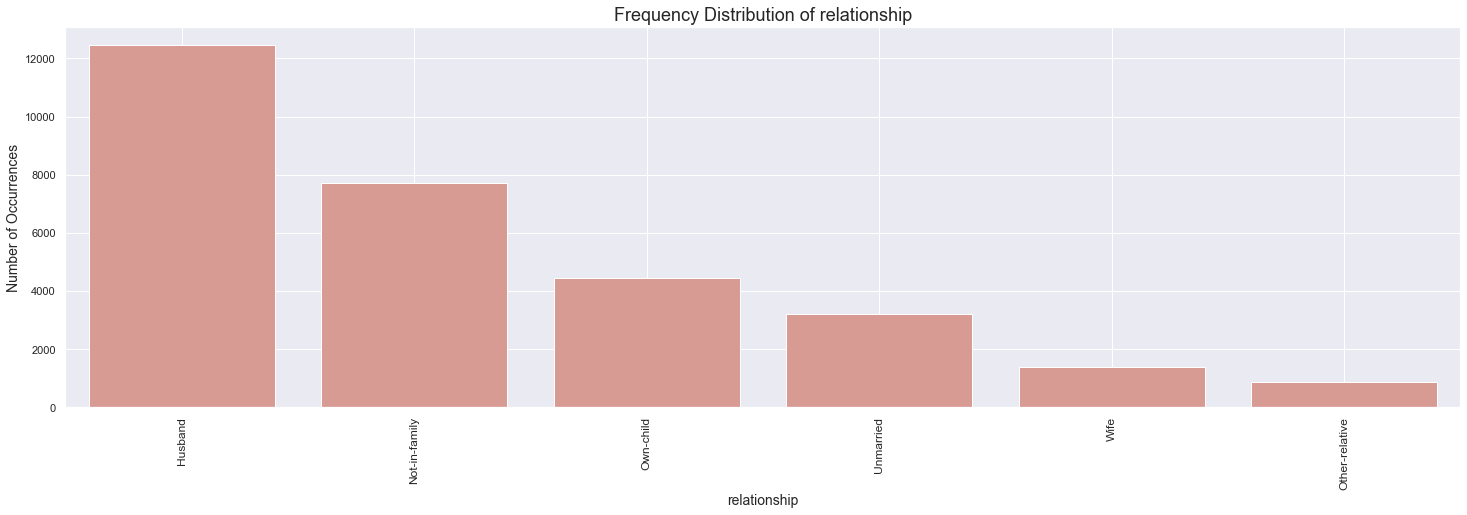

Distribution Plot for race:


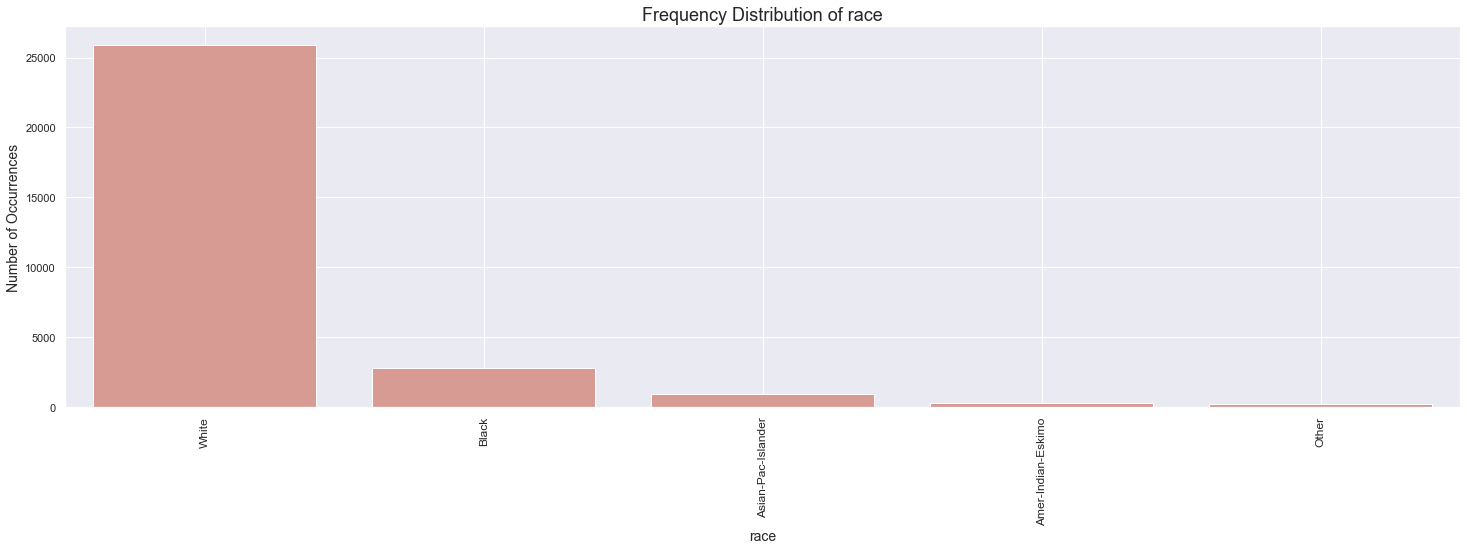

Distribution Plot for sex:


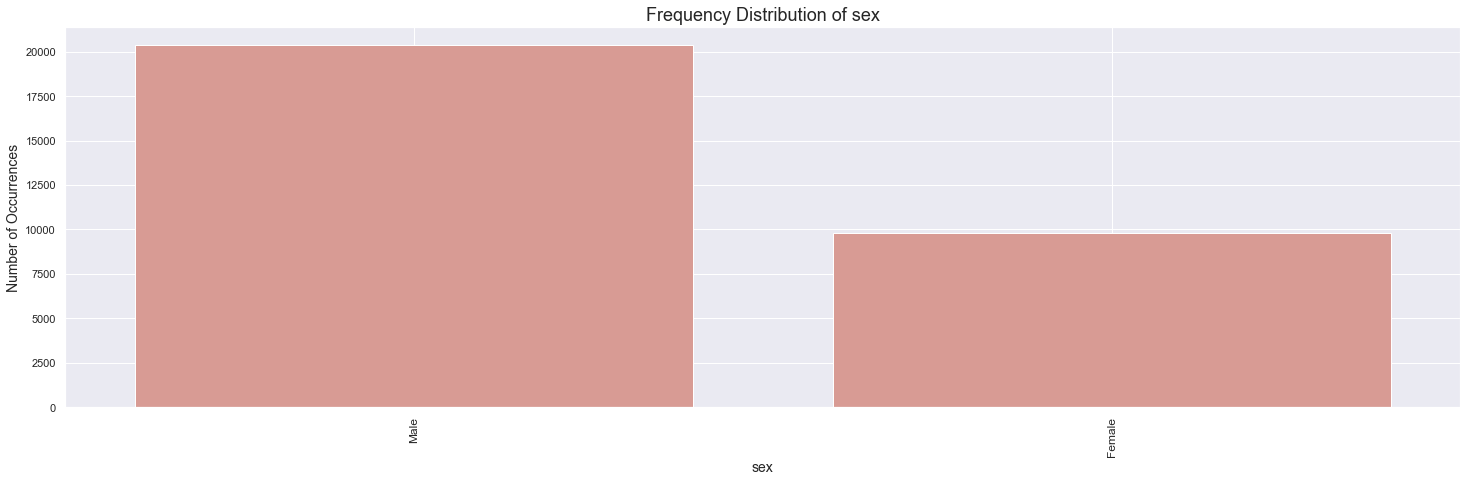

Distribution Plot for capital-gain:


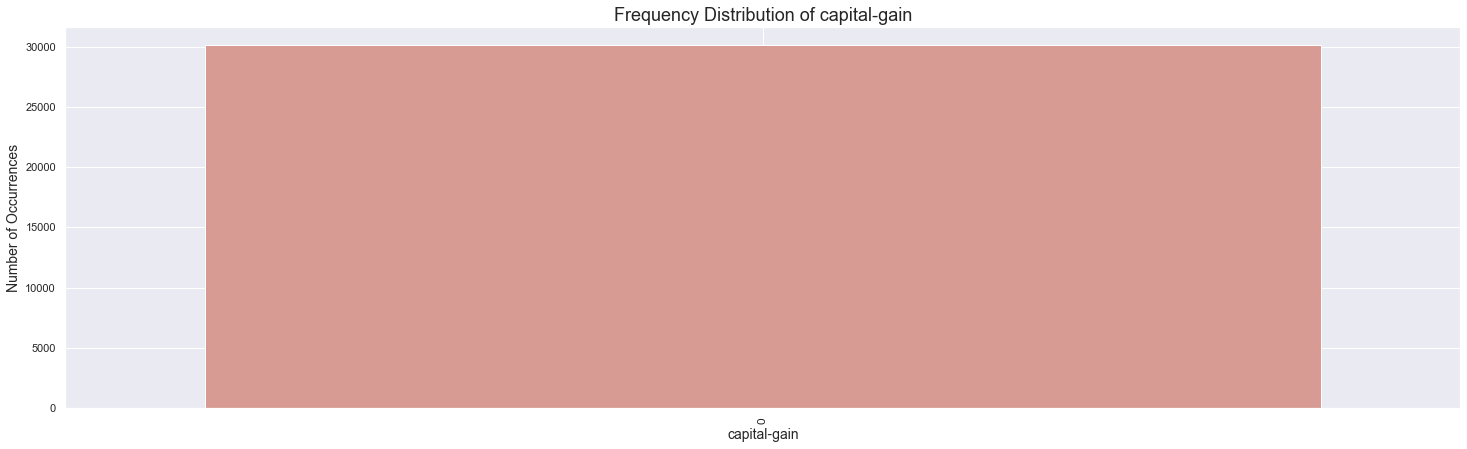

Distribution Plot for capital-loss:


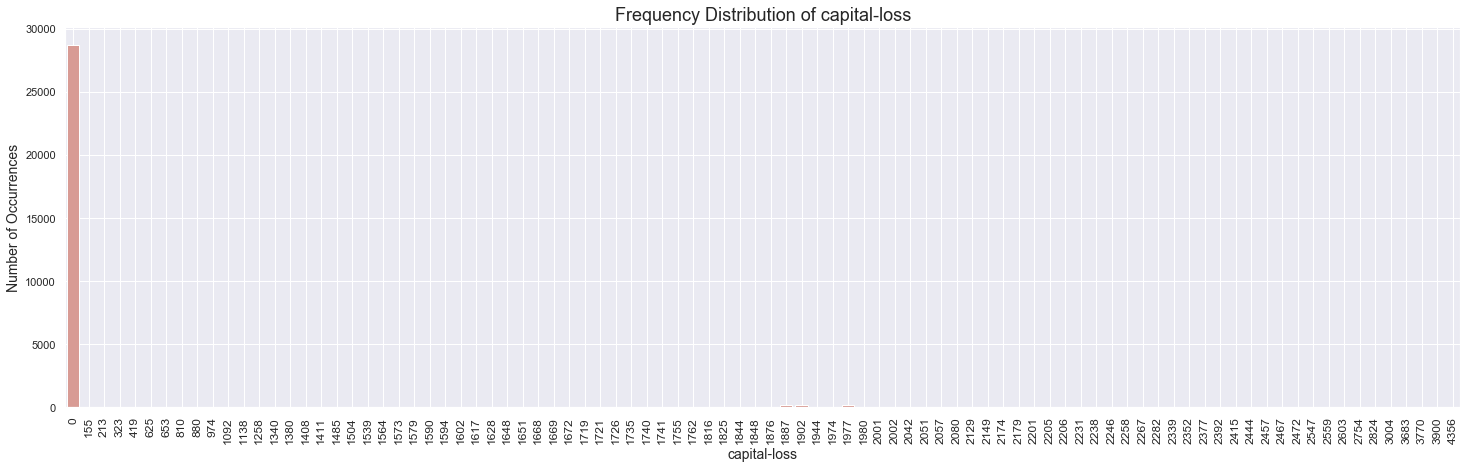

Distribution Plot for hours-per-week:


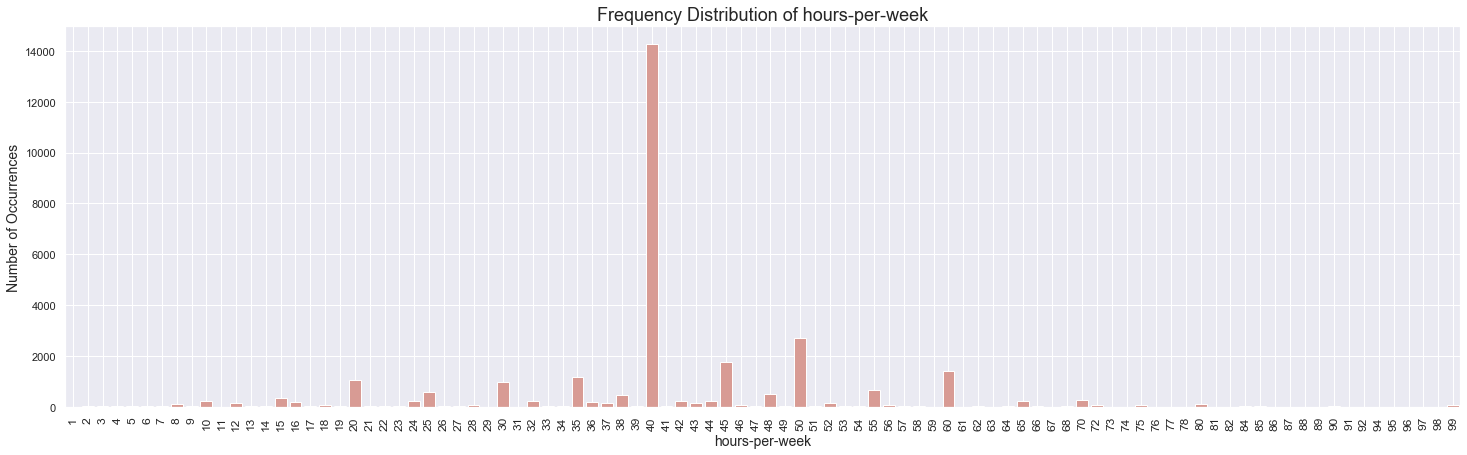

Distribution Plot for native-country:


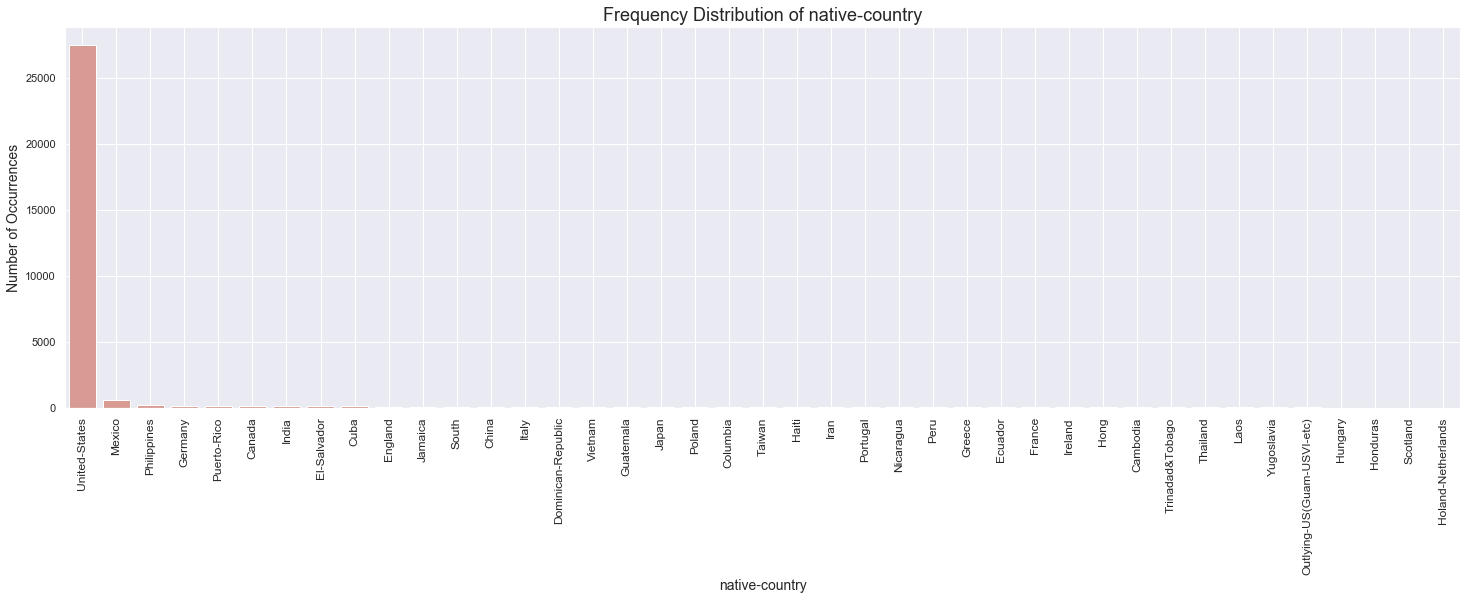

Distribution Plot for salary:


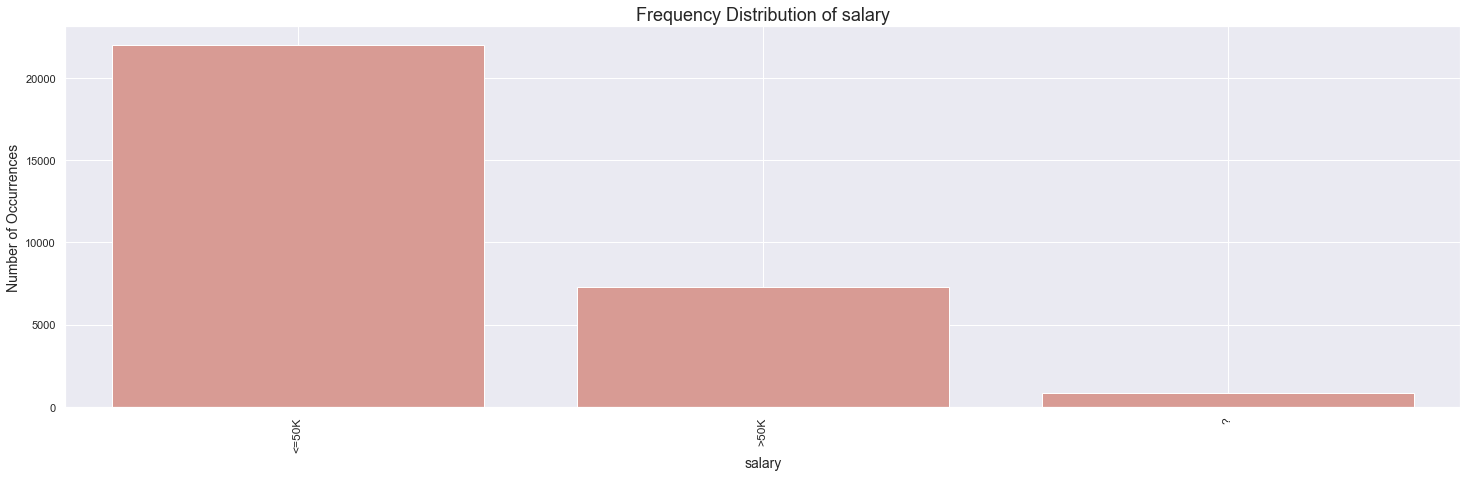

In [5]:
for column in census_df.columns:
    histograms_plot(census_df,column)


# Preprocessing Dataset

In [6]:
#Make a copy of the dataset 
census_clean_df = census_df.copy()

#Convert all the fields to lower case
census_clean_df.columns = map(str.lower, census_clean_df.columns)
census_clean_df= census_clean_df.applymap(lambda s:s.lower() if type(s) == str else s)


In [7]:
#check if any column has null values
census_clean_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
id                0
dtype: int64

In [8]:
# check if the column has correct categorical values (looking for missing or corrupted values in 'occupation' field)
print(census_clean_df['occupation'].value_counts())
print(census_clean_df['occupation'].value_counts().count())

sales                3130
exec-managerial      3011
craft-repair         2978
prof-specialty       2967
adm-clerical         2802
other-service        2336
?                    2288
machine-op-inspct    1246
transport-moving     1141
handlers-cleaners    1011
farming-fishing       726
tech-support          696
protective-serv       489
craft repair          293
execmanagerial        287
craftrepair           287
profspecialty         282
prof specialty        278
otherservice          265
other service         237
admclerical           235
adm clerical          234
exec managerial       223
machineop-inspct      119
transport moving      118
machine op-inspct     117
transportmoving       117
machine-opinspct      109
handlerscleaners      100
machine-op inspct      96
                     ... 
armed-frces             1
transportmovig          1
amclerical              1
trasportmoving          1
tech supprt             1
handers cleaners        1
priv-house-sev          1
pof specialt

In [9]:
# check if the column has correct numerical values (looking for missing or corrupted values in 'education-num' field)
workclass = census_clean_df['education-num'].unique()
np.sort(workclass)

array([-43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31,
       -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
       -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60])

In [10]:
# Since 'occupation' has corrupted values, find all the unique values in the column to write a regEx 
occupation = census_clean_df['occupation'].unique()
np.sort(occupation)

array(['?', 'achine op-inspct', 'achine-op-inspct', 'achineop-inspct',
       'ad-clerical', 'adm clerial', 'adm clerica', 'adm clerical',
       'adm clericl', 'adm clrical', 'adm lerical', 'adm-cerical',
       'adm-cleical', 'adm-cleicl', 'adm-clercal', 'adm-clerial',
       'adm-clerica', 'adm-clerical', 'adm-clericl', 'adm-clrical',
       'adm-lerical', 'admcerical', 'admcleical', 'admclercal',
       'admclerial', 'admclerica', 'admclerical', 'admclericl',
       'admclrical', 'admlerical', 'ales', 'am-clerical', 'amclerical',
       'andlers-cleaners', 'armed forces', 'armed-forces', 'armed-frces',
       'arming-fishing', 'caf-repair', 'caft-repair', 'craf-repair',
       'crafrepair', 'craft epair', 'craft reair', 'craft repai',
       'craft repair', 'craft repar', 'craft repir', 'craft rpair',
       'craft-epair', 'craft-reair', 'craft-reir', 'craft-repai',
       'craft-repair', 'craft-repar', 'craft-repir', 'craft-rpair',
       'craftepair', 'craftrepai', 'craftrepair',

In [11]:
# Dictionary containing regEx to perform search & replace operation on dataset

regexDict = {
              'workclass' : {'private':'Private', 
                            'without-pay':'Without-pay', 
                            'fed.*':'Federal-gov', 
                            'local.*':'Local-gov',
                            '.*n?ot.*':'Self-emp-not-inc',
                            'self.*':'Self-emp-inc',
                            'state.*':'State-gov'
                           },
    
              'occupation' : {
                              '(sales|sale|saes|sals|sles|ales|sal)':'Sales',
                              '((pri?v).*)':'Priv-house-serv',
                              '(t?ransport|trans|tansport|transort|.*sport|tranport|ranspor).*':'Transport-moving', 
                              '((tech).*|.*(support))':'Tech-support', 
                              '((adm).*|.*(cle?rica?l))':'Adm-clerical', 
                              '((craft).*|.*(repair))':'Craft-repair', 
                              '((armed).*|.*(forces))':'Armed-forces', 
                              '((exec).*|.*(managerial?))':'Exec-managerial', 
                              '((farm?ing).*|.*(fishing))':'Farming-fishing', 
                              '((handlers?).*|.*(cleaners))':'Handlers-cleaners', 
                              '((machin?e).*|.*(insp?ct))':'Machine-op-inspct', 
                              '((othe?r).*|.*(service))':'Other-Service', 
                              '((pr?o?te?c?t?i?ve?).*|(rotective).*|(protectie).*|(oher).*)':'Protective-serv', 
                              '(.*special|prof|.*s?peci?alty).*':'Prof-specialty'
                             },
    
            'education' : {
                                'bachelors':4,
                                'some-college':2,
                                '11th':3,
                                'hs-grad':1,
                                'prof-school':5,
                                'assoc-acdm':6, 
                                'assoc-voc':7, 
                                '9th':9, 
                                '7th-8th':8, 
                                '12th':9, 
                                'masters':10,
                                '10th':11,
                                'doctorate':12, 
                                '5th-6th':13, 
                                'preschool':15,
                                 '1st-4th':14
                            }
            }

In [12]:
# Function to fix corrupted Categorical Values 
# in a given dataset by using Dictionary having
# regular expressions.

def fixCorruptedCategoricalValues(dataframe, feature):

    for regexPattern, actualValue in regexDict[feature].items():
        dataframe[feature] = dataframe[feature].replace(to_replace = regexPattern, 
                                                        value = actualValue, 
                                                        regex = True) 
        



In [13]:
# Calling fx fixCorruptedCategoricalValues for categorical data
fixCorruptedCategoricalValues(census_clean_df,'occupation')
fixCorruptedCategoricalValues(census_clean_df,'workclass')

In [14]:
# Change the values of 'education-num'
# based on the values of 'education' field.
census_clean_df['education-num'] = census_clean_df['education'].map(regexDict['education'])

In [15]:
categoricalColumns = ["workclass", "occupation", "salary", "education", "sex", "race", "relationship", "salary", "marital-status", "native-country"]

# Function to fix Missing Categorical Values 
# in a given dataset by filling most frequent values
# for the given field.
def fixMissingCategoricalValues(dataframe):
    for column in categoricalColumns:
        dataframe[column].replace('?', np.nan, inplace=True)

    dataframe.fillna(dataframe.mode().iloc[0], inplace=True)


In [16]:
# Calling fx fixMissingCategoricalValues for categorical data
fixMissingCategoricalValues(census_clean_df)

In [17]:
# Verify if the fields have been populated correctly
print(census_clean_df['occupation'].value_counts())

Craft-repair         6010
Exec-managerial      3706
Prof-specialty       3704
Adm-clerical         3439
Sales                3314
Other-Service        2981
Machine-op-inspct    1813
Transport-moving     1457
Handlers-cleaners    1252
Farming-fishing       906
Tech-support          848
Protective-serv       600
Priv-house-serv       123
Armed-forces            9
Name: occupation, dtype: int64


In [18]:
# Check if field 'Age' has negetive values. 
print(any(census_clean_df["age"]<=0))

True


In [19]:
# Performing cleaning operation for Numeric Data
census_clean_df['age'].replace(0, np.nan, inplace=True)
census_clean_df['age'].fillna((census_clean_df['age'].mean()), inplace=True)

# Replace '?' with Null Values
census_clean_df.replace('?', np.nan, inplace=True)

# list of all columns having Numeric Data
numericColumns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# Replace Null Values with mean value of that column
for column in numericColumns:
    census_clean_df.loc[~(census_clean_df[column] >= 0), column]=np.nan
    census_clean_df=census_clean_df.fillna({column:census_clean_df[column].mean()})
    census_clean_df[column] = census_clean_df[column].apply(np.int64)

In [20]:
# Verify if all the fields have non-null values only.
census_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 16 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
salary            30162 non-null object
id                30162 non-null int64
dtypes: int64(7), object(9)
memory usage: 3.7+ MB


# Histograms after Preprocessing Dataset

Distribution Plot for age:


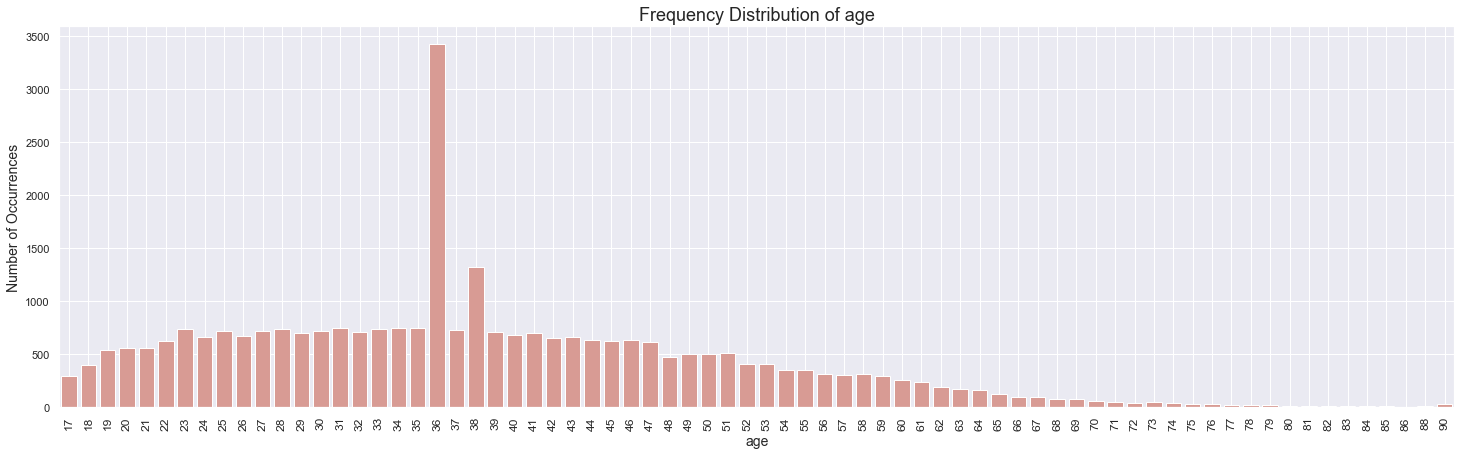

Distribution Plot for workclass:


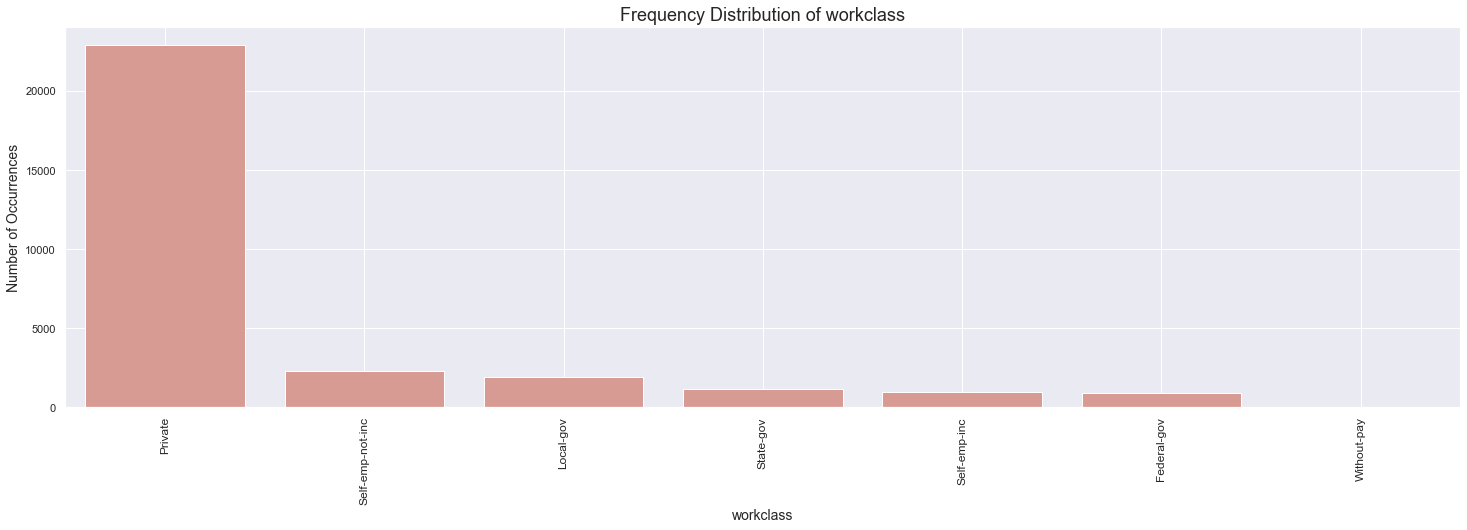

Distribution Plot for fnlwgt:


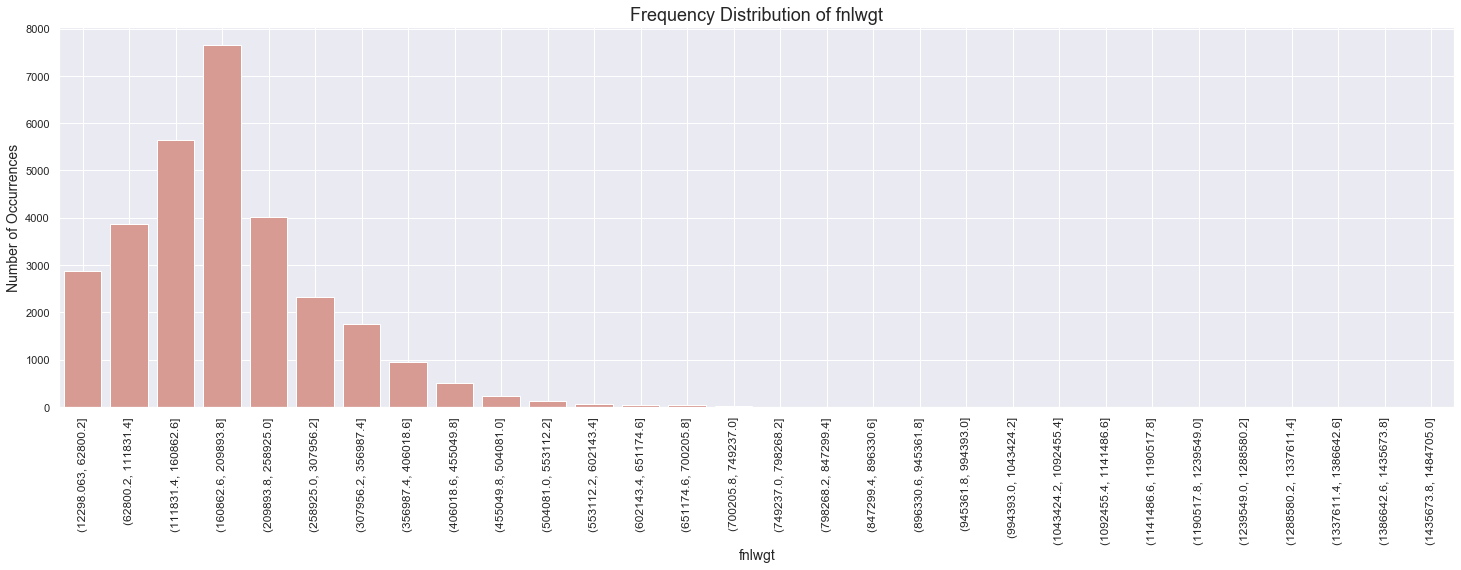

Distribution Plot for education:


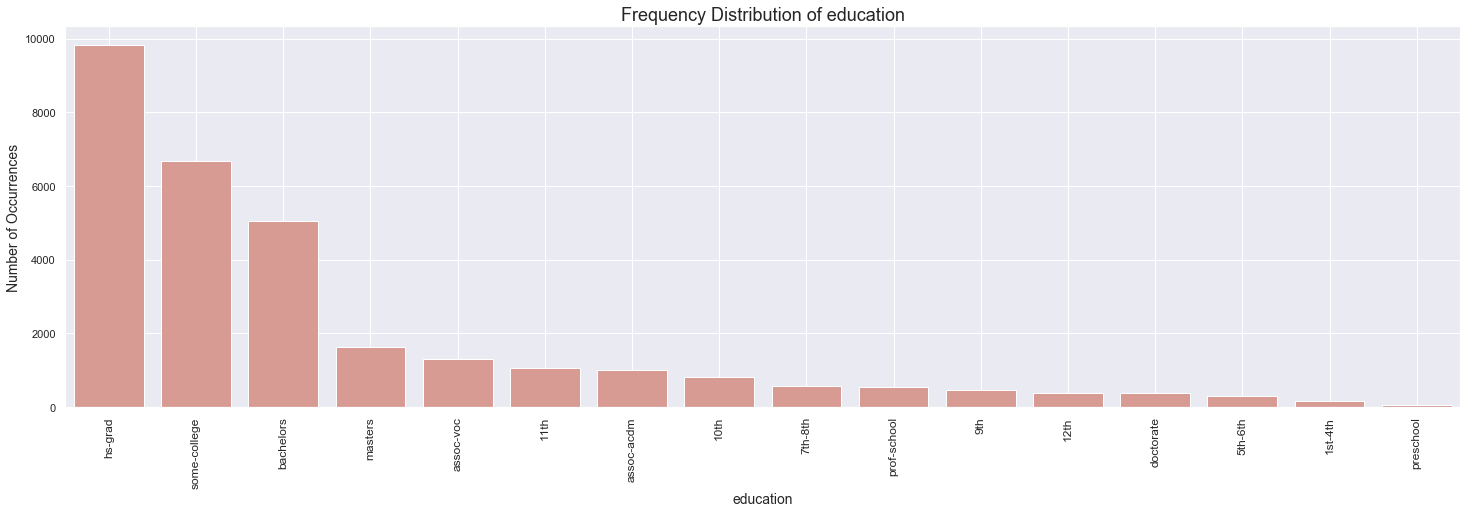

Distribution Plot for education-num:


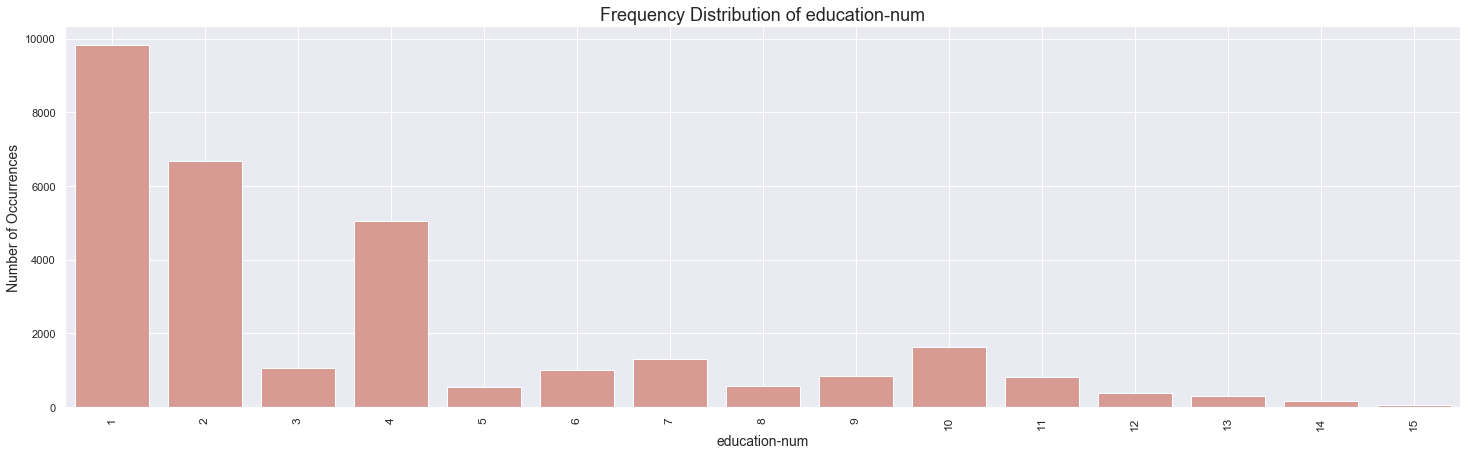

Distribution Plot for marital-status:


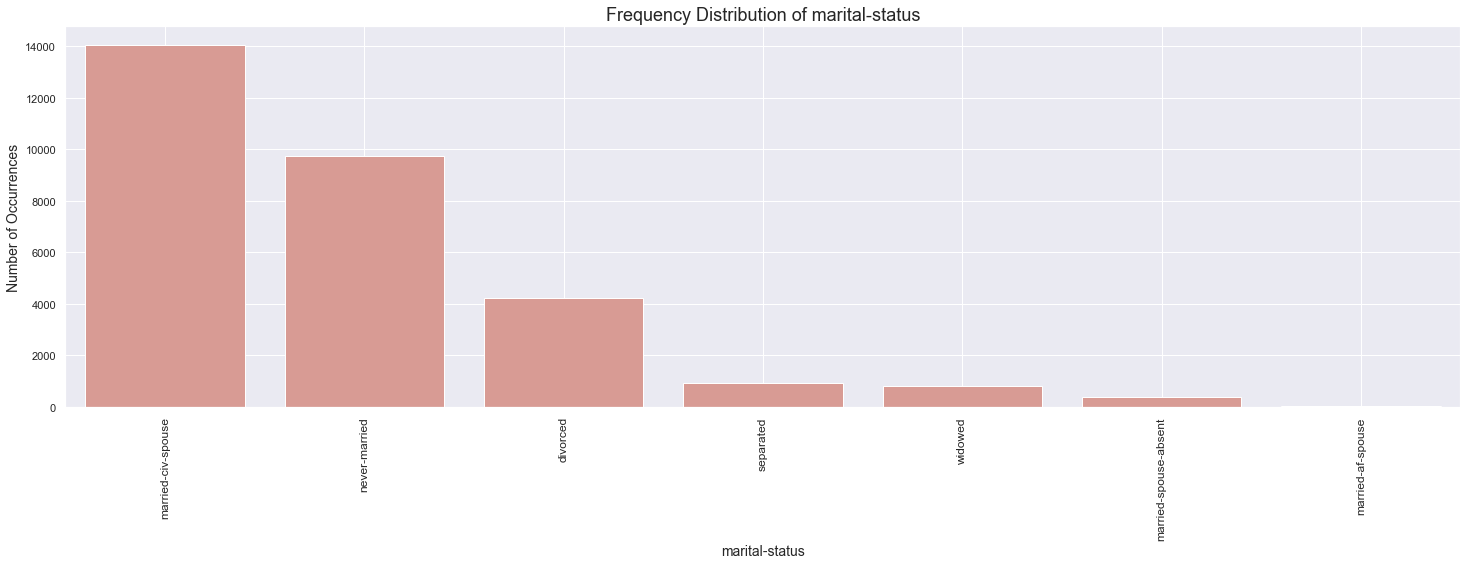

Distribution Plot for occupation:


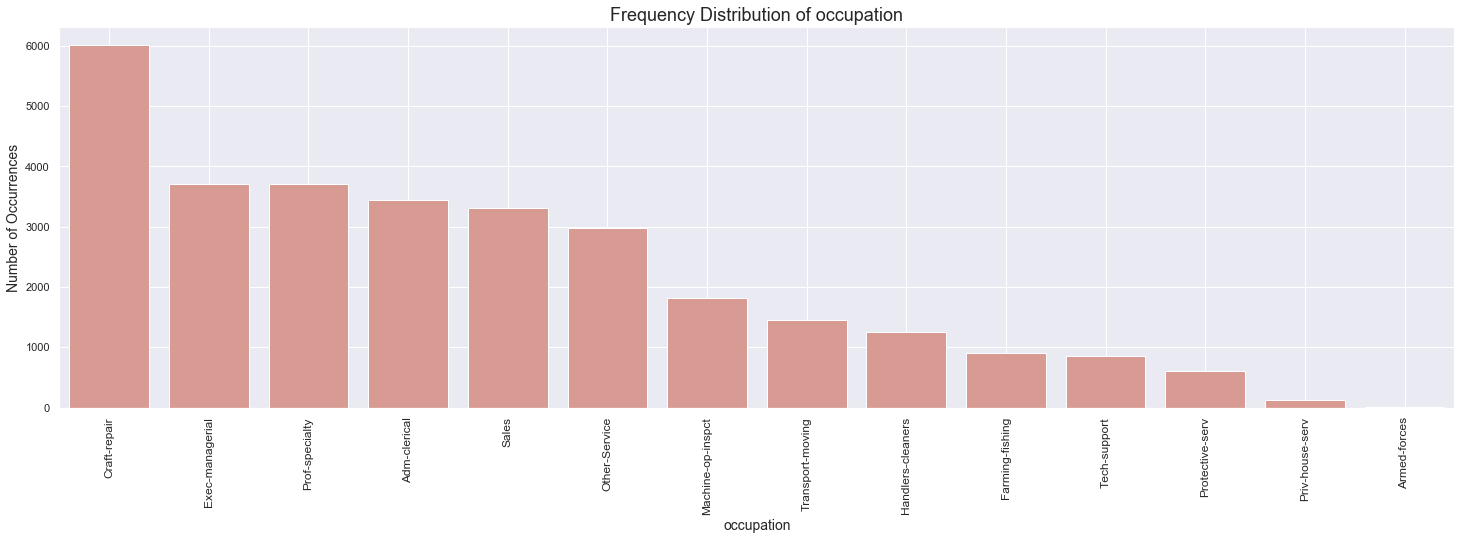

Distribution Plot for relationship:


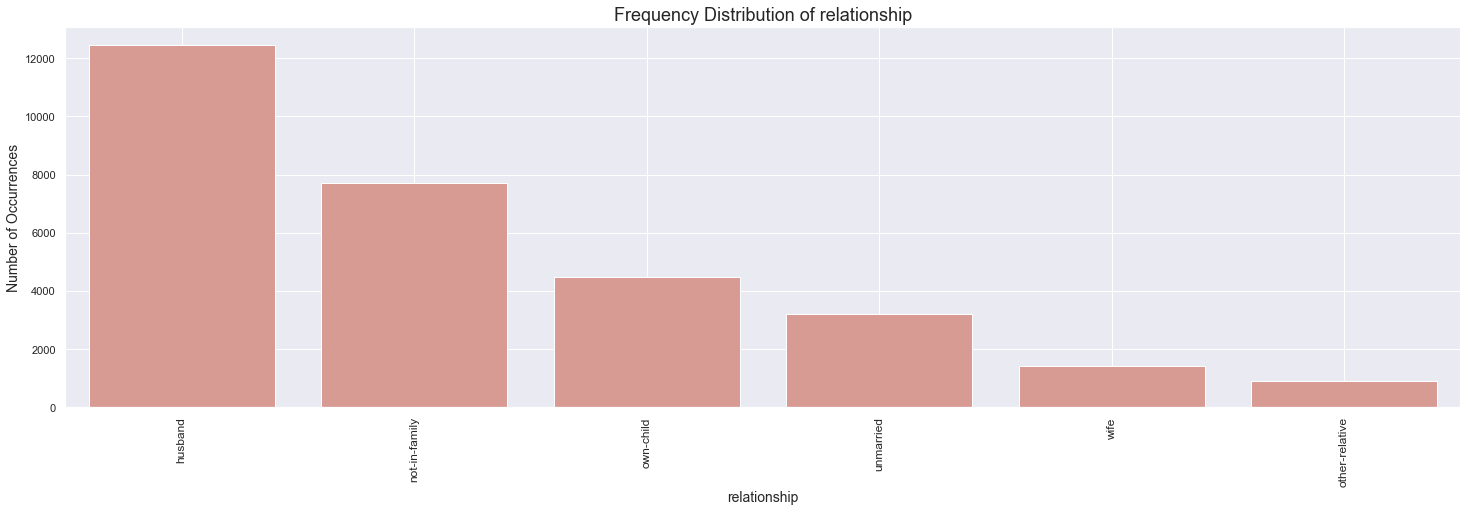

Distribution Plot for race:


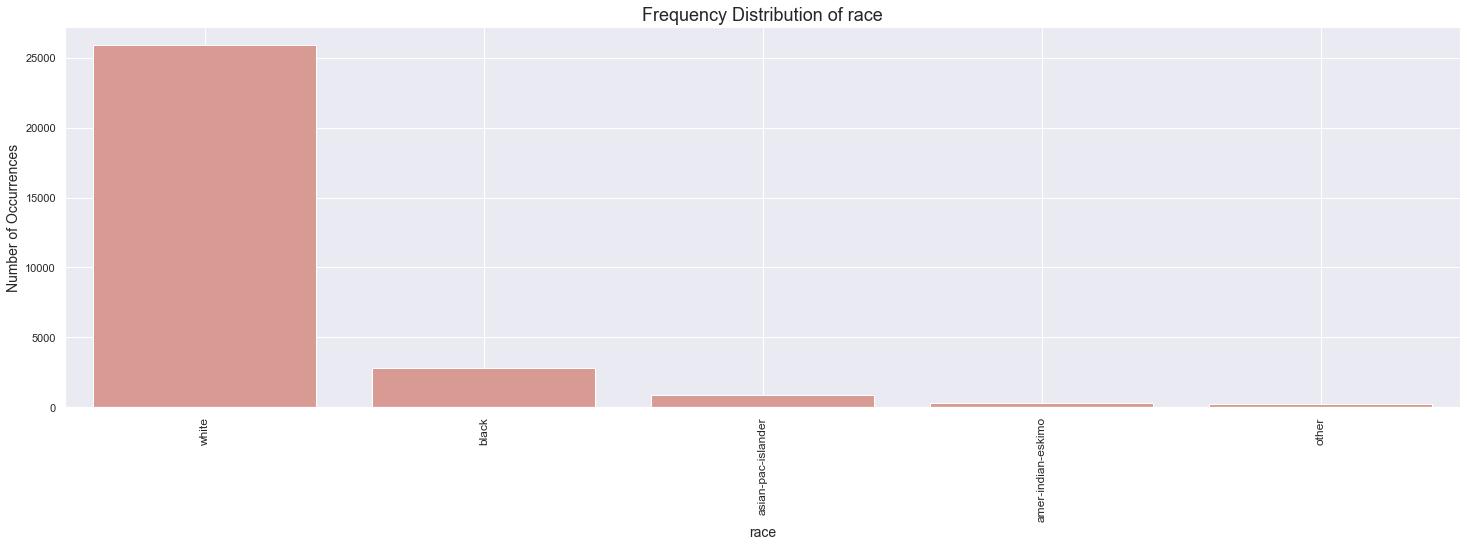

Distribution Plot for sex:


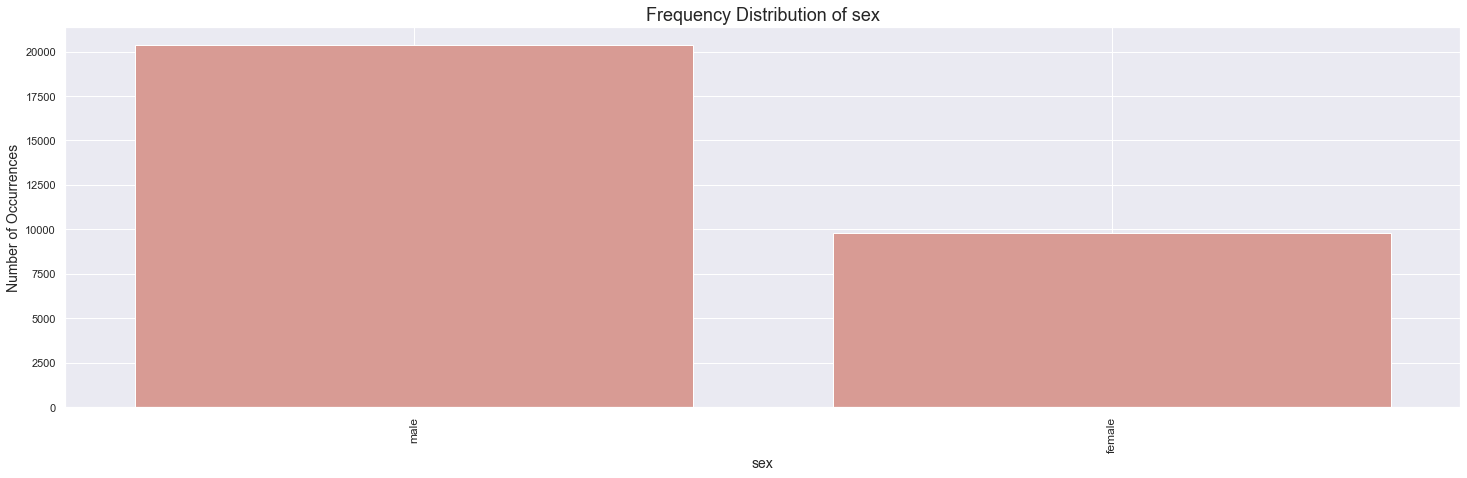

Distribution Plot for capital-gain:


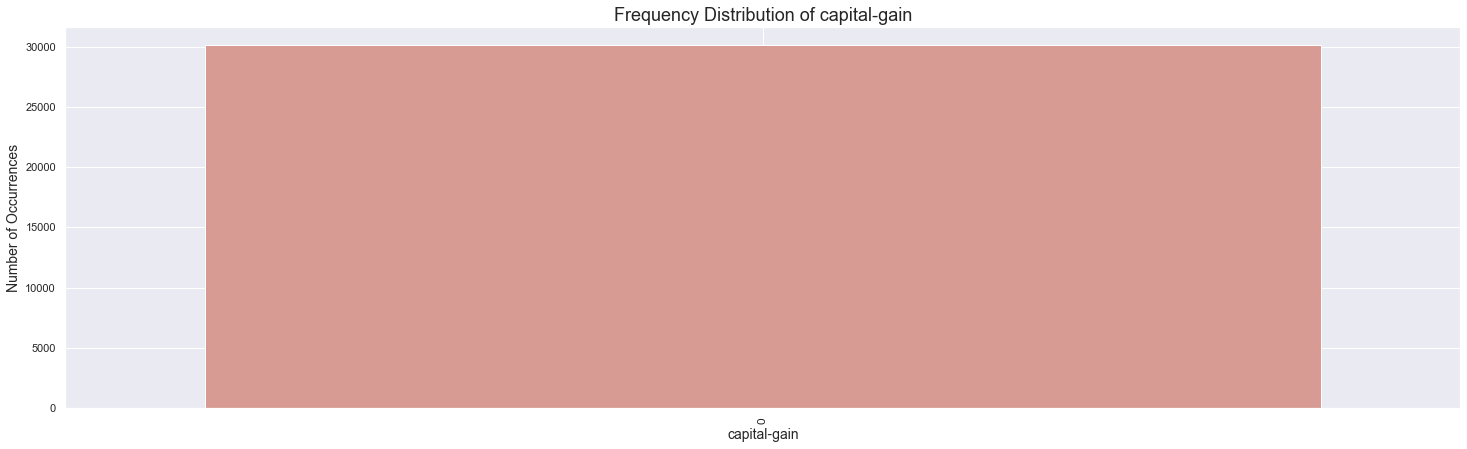

Distribution Plot for capital-loss:


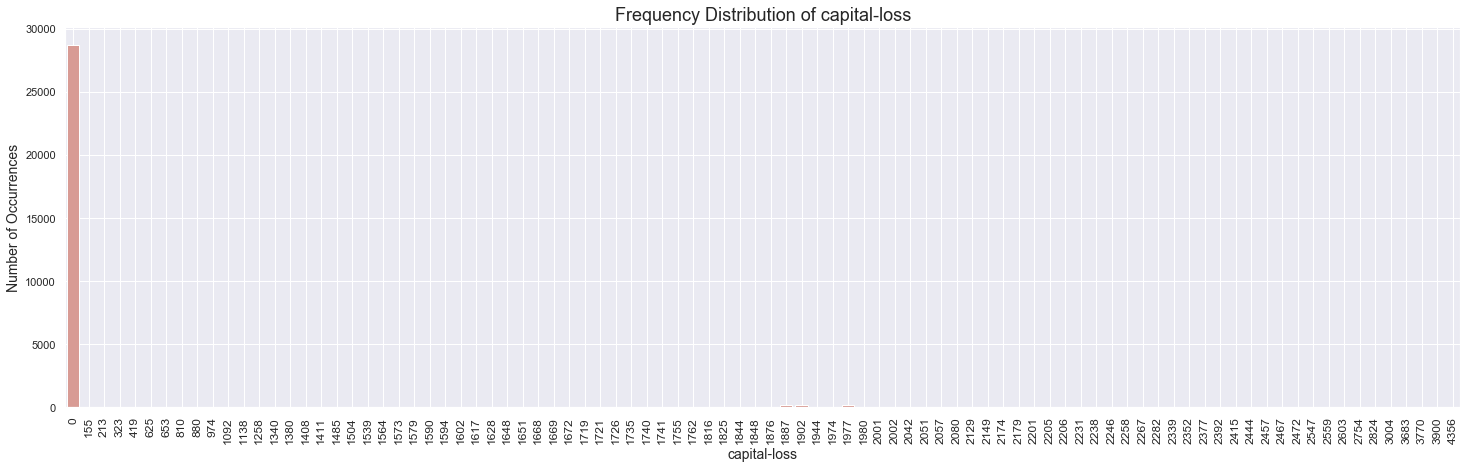

Distribution Plot for hours-per-week:


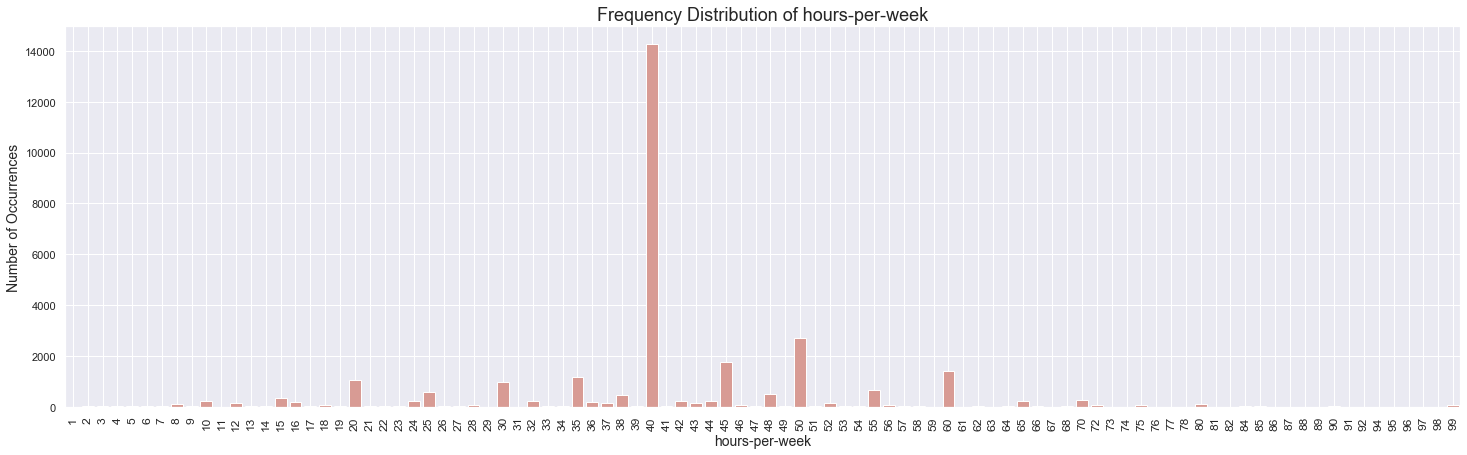

Distribution Plot for native-country:


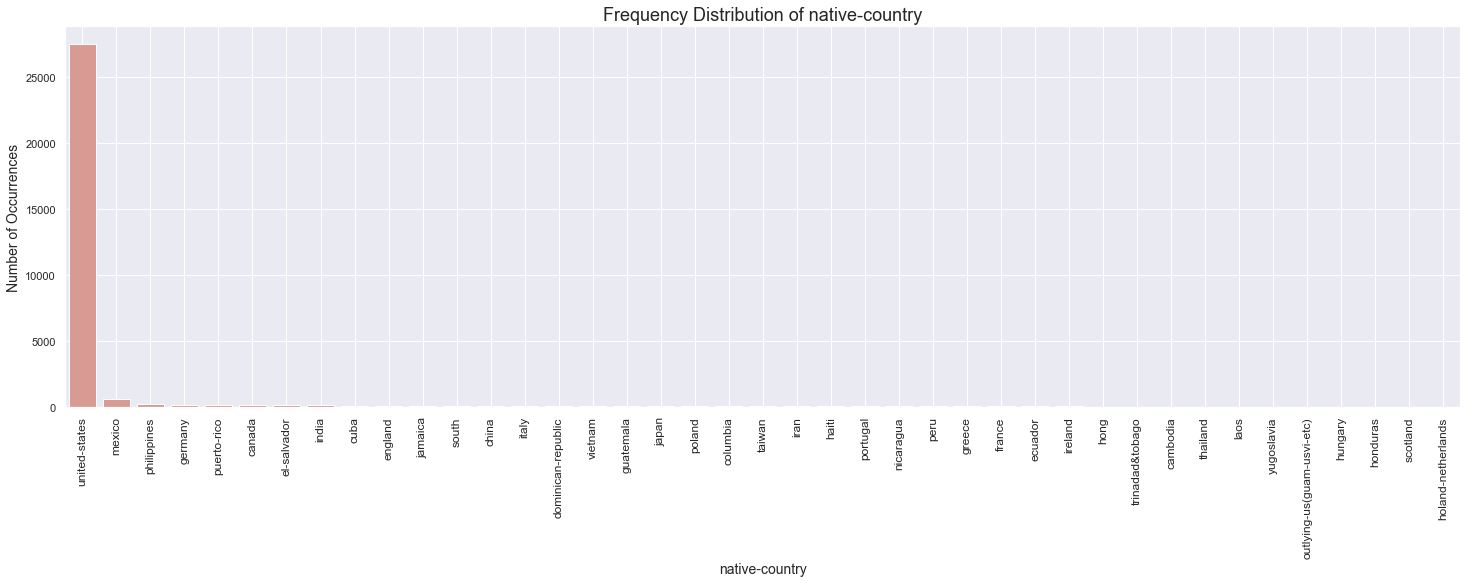

Distribution Plot for salary:


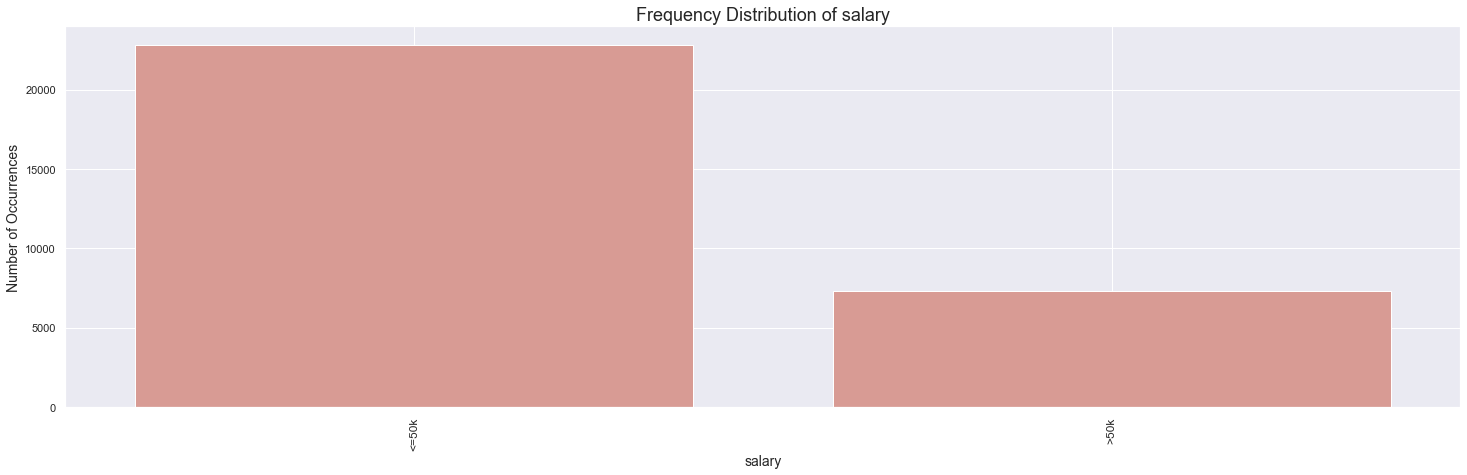

In [21]:
for column in census_clean_df.columns:
    histograms_plot(census_clean_df,column)


# Save Cleaned Dataset to CSV

In [22]:
# Removing index ('id') column as it was not part of the original dataset
# Removing 'capital-gain' column as it does not carry any meaningfull information and all the entries are 0
census_clean_df.drop(['capital-gain','id'], axis=1, inplace=True)

# Saving the Cleaned Dataframe to a CSV file.
census_clean_df.to_csv(r'Dataset1_processed.csv')
